In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Seabornにサンプルデータがあります。
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


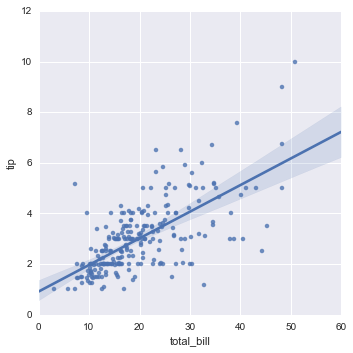

In [4]:
# lmplot() ｘ=total bill y=tipsでプロットします。
sns.lmplot("total_bill","tip",tips)

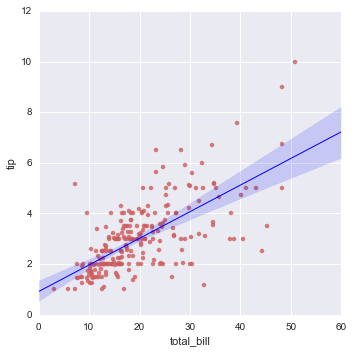

In [5]:
# グラフごとにパラメータを変えられます。
sns.lmplot("total_bill","tip",tips,
                   scatter_kws={'marker':'o', 'color':'indianred'},
                   line_kws={'linewidth':1, 'color':'blue'})

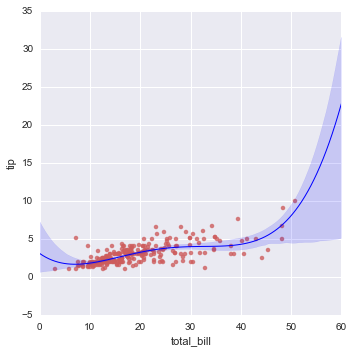

In [7]:
# 4次関数で回帰曲線をひくこともできます。
sns.lmplot("total_bill", "tip", tips, order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

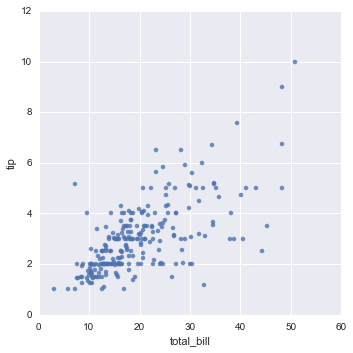

In [15]:
# 単なるプロットもできます。
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

In [9]:
# 離散的な値でもlmplot()は使えます。

# チップの割合を計算します。
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


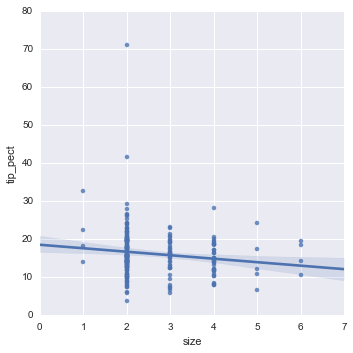

In [11]:
sns.lmplot("size", "tip_pect", tips)

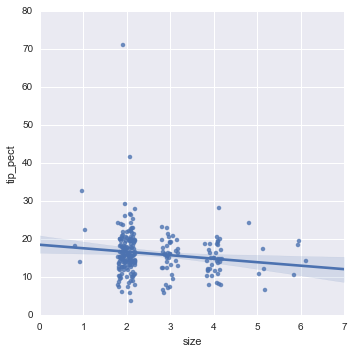

In [13]:
sns.lmplot("size", "tip_pect", tips, x_jitter=0.2)

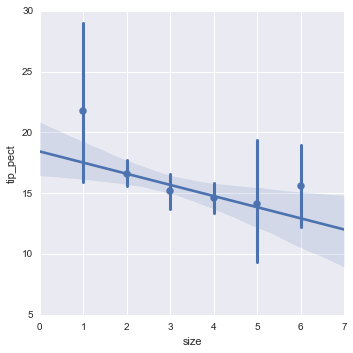

In [27]:
# 特定の推定量を描画することもできます。
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

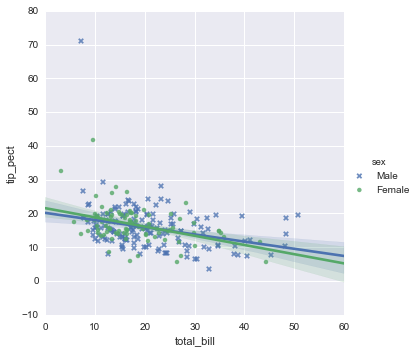

In [31]:
# hueが便利です。
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

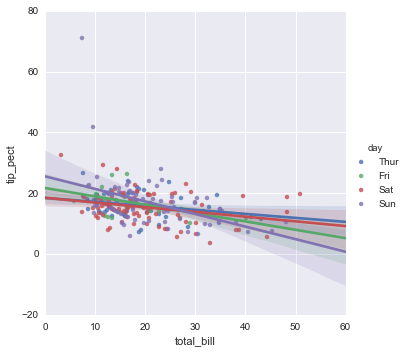

In [30]:
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

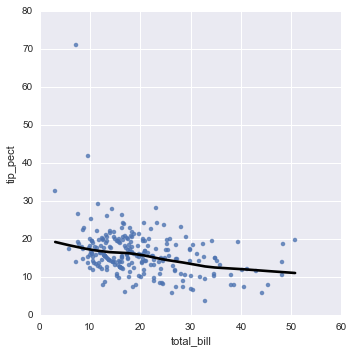

In [29]:
# LOESSの説明（英語）です。
url = 'http://en.wikipedia.org/wiki/Local_regression'
sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

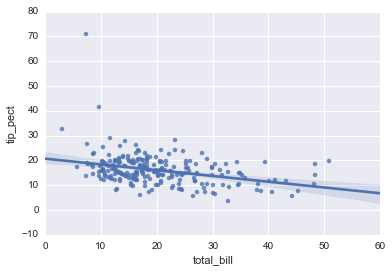

In [28]:
# lmplot() は実は、もっと低レベルな関数regplotを使っています。
sns.regplot("total_bill","tip_pect",tips)

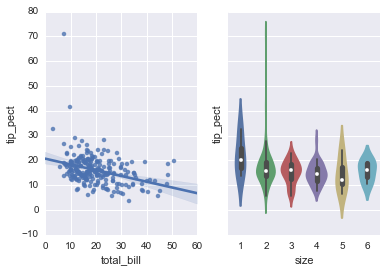

In [27]:
# 描画のエリアを分割することもできます。
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)

sns.regplot("total_bill","tip_pect",tips,ax=axis1)
sns.violinplot(y='tip_pect', x='size', data=tips.sort('size') ,ax=axis2)